# Clustering validation

## importing libraries

In [1]:
%matplotlib inline
import numpy as np
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt

## creating artificial data set

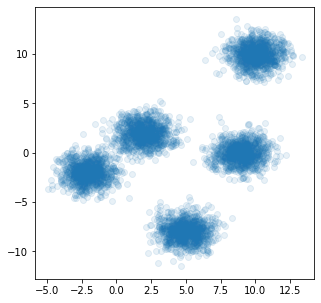

In [2]:
n_samples = 1000

X = np.concatenate((
    np.random.normal((-2, -2), size=(n_samples, 2)),
    np.random.normal((2, 2), size=(n_samples, 2)),
    np.random.normal((9, 0), size=(n_samples, 2)),
    np.random.normal((5, -8), size=(n_samples, 2)),
    np.random.normal((10, 10), size=(n_samples, 2))
))

plt.figure(figsize=(5, 5))
plt.scatter(X[:,0], X[:,1], alpha=.1)
plt.show()

# fitting the k-means
 - create models with  centers

In [3]:
n_clusters_list = np.arange(2, 11)
models = list()
for n_clusters in n_clusters_list:
    model = KMeans(n_clusters)
    model.fit(X)
    models.append(model)

# showing results

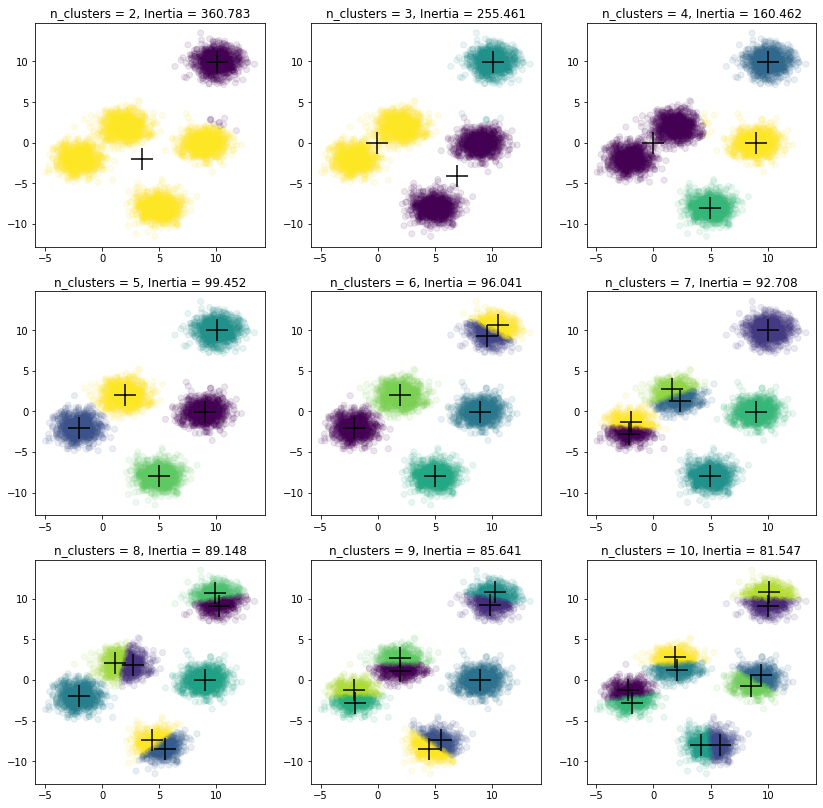

In [4]:
# outputs
num_clusters = len(n_clusters_list)
rows = int(np.ceil(np.sqrt(num_clusters)))
cols = int(np.ceil(num_clusters / rows))
f, axes = plt.subplots(rows, cols, figsize=(14,14))
inertias = list()
for n_clusters, model, axe in zip(n_clusters_list, models, axes.ravel()):
    # get validation metrics
    inertia = np.sqrt(model.inertia_)
    
    fcm_centers = model.cluster_centers_
    fcm_labels = model.predict(X)
    # plot result
    axe.scatter(X[:,0], X[:,1], c=fcm_labels, alpha=.1)
    axe.scatter(fcm_centers[:,0], fcm_centers[:,1], marker="+", s=500, c='black')
    axe.set_title(f'n_clusters = {n_clusters}, Inertia = {inertia:.3f}')
    inertias.append(inertia)
plt.show()

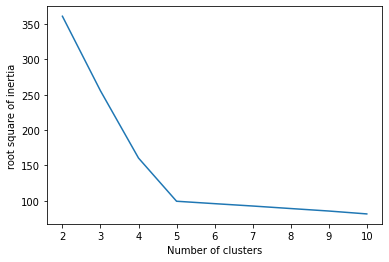

In [5]:
plt.plot(n_clusters_list, inertias)
plt.xlabel('Number of clusters')
plt.ylabel('root square of inertia')
plt.show()